# Diagnosis and DIA (Data Inspection Assistant)

If you cannot import this module, please try: pip install "polars_ds[plot]"

The dataset used for dependency detection can be found on github, at examples/dependency.parquet

The plots cannot be rendered on github. Currently, the plot backend is Altair but this is subject
to change depending on which plotting backend supports Polars more natively.

In [1]:
import polars as pl
import polars_ds as pds
from polars_ds.diagnosis import DIA

In [2]:
df = pds.frame(size=1_000_000).select(
    pds.random(0.0, 12.0).alias("uniform_1"),
    pds.random(0.0, 1.0).alias("uniform_2"),
    pds.random_exp(0.5).alias("exp"),
    pds.random_normal(0.0, 1.0).alias("normal"),
    pds.random_normal(0.0, 1000.0).alias("fat_normal"),
).with_columns(
    pl.concat_list("uniform_2", 1 - pl.col("uniform_2")).alias("list_prob")
)
df.head()

uniform_1,uniform_2,exp,normal,fat_normal,list_prob
f64,f64,f64,f64,f64,list[f64]
4.249838,0.535529,0.116677,0.452596,340.760748,"[0.535529, 0.464471]"
3.731551,0.182835,0.860178,0.067446,-446.695215,"[0.182835, 0.817165]"
9.436045,0.138034,0.451699,-1.902809,1064.472404,"[0.138034, 0.861966]"
1.861168,0.64262,1.34992,1.163649,-1169.929673,"[0.64262, 0.35738]"
7.230876,0.056372,0.807478,-0.36008,1364.430535,"[0.056372, 0.943628]"


In [3]:
dia = DIA(df)

In [4]:
dia.special_values_report()

column,null_count,null%,NaN_count,NaN%,inf_count,Inf%
str,u32,f64,u32,f64,u32,f64
"""uniform_1""",0,0.0,0,0.0,0,0.0
"""uniform_2""",0,0.0,0,0.0,0,0.0
"""exp""",0,0.0,0,0.0,0,0.0
"""normal""",0,0.0,0,0.0,0,0.0
"""fat_normal""",0,0.0,0,0.0,0,0.0


In [5]:
# Only shows for numerical columns
dia.numeric_profile(histogram=True)

GT(_tbl_data=shape: (5, 13)
┌────────────┬────────────┬───────┬───────────┬───┬────────────┬───────────┬───────────┬───────────┐
│ column     ┆ non_null_c ┆ null% ┆ mean      ┆ … ┆ max        ┆ IQR       ┆ outlier_c ┆ histogram │
│ ---        ┆ nt         ┆ ---   ┆ ---       ┆   ┆ ---        ┆ ---       ┆ nt        ┆ ---       │
│ str        ┆ ---        ┆ f64   ┆ f64       ┆   ┆ f64        ┆ f64       ┆ ---       ┆ struct[1] │
│            ┆ u32        ┆       ┆           ┆   ┆            ┆           ┆ u32       ┆           │
╞════════════╪════════════╪═══════╪═══════════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ uniform_1  ┆ 1000000    ┆ 0.0   ┆ 5.995549  ┆ … ┆ 11.999959  ┆ 5.998388  ┆ 0         ┆ {[49948,  │
│            ┆            ┆       ┆           ┆   ┆            ┆           ┆           ┆ 49741, …  │
│            ┆            ┆       ┆           ┆   ┆            ┆           ┆           ┆ 50188]}   │
│ uniform_2  ┆ 1000000    ┆ 0.0   ┆ 0.500459  ┆ … ┆ 0.999998   ┆ 0.499236  ┆ 0         ┆ {[49466,  │
│            ┆            ┆       ┆           ┆   ┆            ┆           ┆           ┆ 49815, …  │
│            ┆            ┆       ┆           ┆   ┆            ┆           ┆           ┆ 50015]}   │
│ exp        ┆ 1000000    ┆ 0.0   ┆ 1.998133  ┆ … ┆ 27.043094  ┆ 2.193277  ┆ 48487     ┆ {[491376, │
│            ┆            ┆       ┆           ┆   ┆            ┆           ┆           ┆ 250410, … │
│            ┆            ┆       ┆           ┆   ┆            ┆           ┆           ┆ 1]}       │
│ normal     ┆ 1000000    ┆ 0.0   ┆ -0.000062 ┆ … ┆ 4.880982   ┆ 1.349561  ┆ 7030      ┆ {[17,     │
│            ┆            ┆       ┆           ┆   ┆            ┆           ┆           ┆ 121, …    │
│            ┆            ┆       ┆           ┆   ┆            ┆           ┆           ┆ 6]}       │
│ fat_normal ┆ 1000000    ┆ 0.0   ┆ -0.068188 ┆ … ┆ 4687.80620 ┆ 1347.8115 ┆ 7139      ┆ {[3, 18,  │
│            ┆            ┆       ┆           ┆   ┆ 3          ┆ 29        ┆           ┆ … 14]}    │
└────────────┴────────────┴───────┴───────────┴───┴────────────┴───────────┴───────────┴───────────┘, _body=<great_tables._gt_data.Body object at 0x72c9e77ca600>, _boxhead=Boxhead([ColInfo(var='column', type=<ColInfoTypeEnum.stub: 2>, column_label='column', column_align='left', column_width=None), ColInfo(var='non_null_cnt', type=<ColInfoTypeEnum.default: 1>, column_label='non_null_cnt', column_align='center', column_width=None), ColInfo(var='null%', type=<ColInfoTypeEnum.default: 1>, column_label='null%', column_align='right', column_width=None), ColInfo(var='mean', type=<ColInfoTypeEnum.default: 1>, column_label='mean', column_align='right', column_width=None), ColInfo(var='std', type=<ColInfoTypeEnum.default: 1>, column_label='std', column_align='right', column_width=None), ColInfo(var='min', type=<ColInfoTypeEnum.default: 1>, column_label='min', column_align='right', column_width=None), ColInfo(var='q1', type=<ColInfoTypeEnum.default: 1>, column_label='q1', column_align='right', column_width=None), ColInfo(var='median', type=<ColInfoTypeEnum.default: 1>, column_label='median', column_align='right', column_width=None), ColInfo(var='q3', type=<ColInfoTypeEnum.default: 1>, column_label='q3', column_align='right', column_width=None), ColInfo(var='max', type=<ColInfoTypeEnum.default: 1>, column_label='max', column_align='right', column_width=None), ColInfo(var='IQR', type=<ColInfoTypeEnum.default: 1>, column_label='IQR', column_align='right', column_width=None), ColInfo(var='outlier_cnt', type=<ColInfoTypeEnum.default: 1>, column_label='outlier_cnt', column_align='center', column_width=None), ColInfo(var='histogram', type=<ColInfoTypeEnum.default: 1>, column_label='histogram', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x72c9f1af8530>, _spanners=Spanners([]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead='column', _source_notes=[], _footnotes=[], _st

In [6]:
# Don't compute histogram. Use Polars as output format instead of GT
dia.numeric_profile(histogram=False, gt=False) 

column,non_null_cnt,null%,mean,std,min,q1,median,q3,max,IQR,outlier_cnt
str,u32,f64,f64,f64,f64,f64,f64,f64,f64,f64,u32
"""uniform_1""",1000000,0.0,5.995549,3.463553,0.000005,2.996175,5.99,8.994563,11.999959,5.998388,0
"""uniform_2""",1000000,0.0,0.500459,0.288469,8.6045e-7,0.250452,0.5,0.749688,0.999998,0.499236,0
"""exp""",1000000,0.0,1.998133,1.997231,0.000003,0.575207,1.39,2.768484,27.043094,2.193277,48487
"""normal""",1000000,0.0,-0.000062,1.000921,-4.59686,-0.674608,0.0,0.674954,4.880982,1.349561,7030
"""fat_normal""",1000000,0.0,-0.068188,999.83355,-5098.976597,-674.608916,0.19,673.202613,4687.806203,1347.811529,7139


In [7]:
print(dia.infer_corr())
print(dia.infer_corr(method = "kendall"))
print(dia.infer_corr(method = "spearman"))

shape: (10, 3)
┌───────────┬────────────┬───────────┐
│ x         ┆ y          ┆ corr      │
│ ---       ┆ ---        ┆ ---       │
│ str       ┆ str        ┆ f64       │
╞═══════════╪════════════╪═══════════╡
│ exp       ┆ normal     ┆ -0.001707 │
│ uniform_1 ┆ fat_normal ┆ 0.00149   │
│ uniform_1 ┆ exp        ┆ 0.001122  │
│ exp       ┆ fat_normal ┆ -0.001018 │
│ uniform_1 ┆ normal     ┆ 0.000851  │
│ uniform_2 ┆ normal     ┆ -0.000741 │
│ uniform_2 ┆ fat_normal ┆ 0.000735  │
│ uniform_1 ┆ uniform_2  ┆ -0.000584 │
│ normal    ┆ fat_normal ┆ 0.000249  │
│ uniform_2 ┆ exp        ┆ -0.000009 │
└───────────┴────────────┴───────────┘
shape: (10, 3)
┌───────────┬────────────┬───────────┐
│ x         ┆ y          ┆ corr      │
│ ---       ┆ ---        ┆ ---       │
│ str       ┆ str        ┆ f64       │
╞═══════════╪════════════╪═══════════╡
│ exp       ┆ fat_normal ┆ -0.000963 │
│ uniform_1 ┆ exp        ┆ 0.000902  │
│ uniform_1 ┆ fat_normal ┆ 0.000878  │
│ exp       ┆ normal     ┆ -0.0008

In [8]:
dia.meta()

{'numerics': ['uniform_1', 'uniform_2', 'exp', 'normal', 'fat_normal'],
 'ints': [],
 'floats': ['uniform_1', 'uniform_2', 'exp', 'normal', 'fat_normal'],
 'strs': [],
 'bools': [],
 'cats': [],
 'list_floats': ['list_prob'],
 'list_bool': [],
 'list_str': [],
 'list_ints': [],
 'simple_types': ['uniform_1',
  'uniform_2',
  'exp',
  'normal',
  'fat_normal',
  'list_prob'],
 'other_types': []}

In [9]:
# Uniform_2 can potentially be a probability score column (e.g. output of predict_proba, but taking values only for class =1)
# list_prob can potentially be a 2-class probability column (e.g. output of predict_proba)
dia.infer_prob()

['uniform_2', 'list_prob']

# Dependency Detection, Null Distributions, Distribution Comparisons

Does knowing values in column A tell us values in column B?

In [10]:
df = pl.read_parquet("dependency.parquet")
df.head()

ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
str,str,str,str,str,str,str,str,i64,f64,str,str,str,str,str,f64,i64,i64,f64,i64,i64,i64
"""APPC90493171225""","""Female""","""23/07/79""","""15/07/16""","""C10001""","""A""","""COM0044082""","""A""",4,2000.0,"""B001""","""P""","""N""","""S122""","""G""",0.0,null,null,null,null,0,0
"""APPD40611263344""","""Male""","""07/12/86""","""04/07/16""","""C10003""","""A""","""COM0000002""","""C""",1,3500.0,"""B002""","""P""","""Y""","""S122""","""G""",0.0,20000,2,13.25,953,10,0
"""APPE70289249423""","""Male""","""10/12/82""","""19/07/16""","""C10125""","""C""","""COM0005267""","""C""",4,2250.0,"""B003""","""G""","""Y""","""S143""","""B""",0.0,45000,4,null,null,0,0
"""APPF80273865537""","""Male""","""30/01/89""","""09/07/16""","""C10477""","""C""","""COM0004143""","""A""",4,3500.0,"""B003""","""G""","""Y""","""S143""","""B""",0.0,92000,5,null,null,7,0
"""APPG60994436641""","""Male""","""19/04/85""","""20/07/16""","""C10002""","""A""","""COM0001781""","""A""",4,10000.0,"""B001""","""P""","""Y""","""S134""","""B""",2500.0,50000,2,null,null,10,0


In [11]:
df.shape

(69713, 22)

In [12]:
dia = DIA(df)

In [13]:
dia.infer_dependency()

/tmp/ipykernel_26787/3037619369.py:1: UserWarning: The following columns are dropped because they cannot be used in dependency detection: ['Monthly_Income', 'Existing_EMI', 'Interest_Rate']
  dia.infer_dependency()


column,by,cond_entropy
str,str,f64
"""Gender""","""ID""",0.0
"""Contacted""","""ID""",0.0
"""Approved""","""ID""",0.0
"""Primary_Bank_Type""","""Customer_Existing_Primary_Bank…",0.0
"""Primary_Bank_Type""","""ID""",0.0
…,…,…
"""Loan_Amount""","""City_Code""",2.702889
"""City_Code""","""EMI""",3.147327
"""Lead_Creation_Date""","""EMI""",3.92818


/home/tq/Projects/polars_ds_extension/python/polars_ds/diagnosis/diagnosis.py:799: UserWarning: The following columns are dropped because they cannot be used in dependency detection: ['Monthly_Income', 'Existing_EMI', 'Interest_Rate']
  dep_frame = self.infer_dependency(subset=subset)


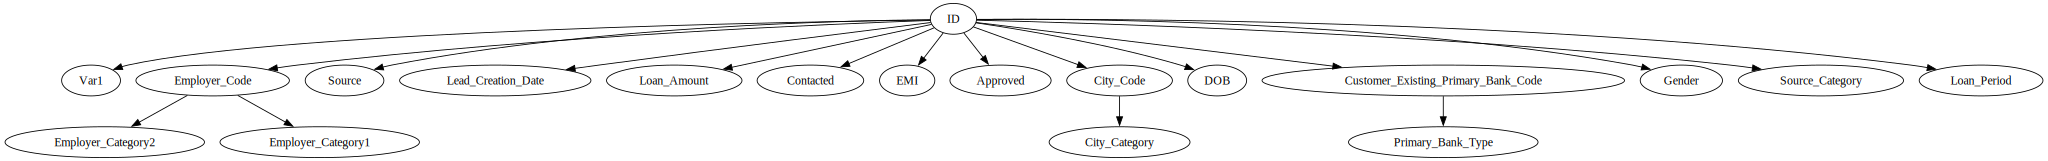

In [14]:
dia.plot_dependency()

/home/tq/Projects/polars_ds_extension/python/polars_ds/diagnosis/diagnosis.py:799: UserWarning: The following columns are dropped because they cannot be used in dependency detection: ['Monthly_Income', 'Existing_EMI', 'Interest_Rate']
  dep_frame = self.infer_dependency(subset=subset)


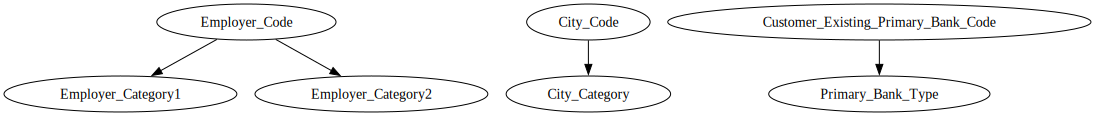

In [15]:
# ID implies everything, of course, because ID is unique.
# So let's not plot it
dia.plot_dependency(subset=pl.all().exclude("ID"))

In [16]:
# Basic stats about string columns
dia.str_stats()

column,null_count,n_unique,most_freq,most_freq_cnt,min_byte_len,min_char_len,avg_byte_len,avg_char_len,max_byte_len,max_char_len,5p_byte_len,95p_byte_len
str,u32,u32,str,u32,u32,u32,f64,f64,u32,u32,f64,f64
"""ID""",0,69713,"""APPC90493171225""",1,15,15,15.0,15.0,15,15,15.0,15.0
"""Gender""",0,2,"""Male""",39949,4,4,4.853901,4.853901,6,6,4.0,6.0
"""DOB""",15,10760,"""11/01/82""",253,8,8,8.0,8.0,8,8,8.0,8.0
"""Lead_Creation_Date""",0,92,"""02/09/16""",1838,8,8,8.0,8.0,8,8,8.0,8.0
"""City_Code""",814,679,"""C10001""",10007,6,6,6.0,6.0,6,6,6.0,6.0
…,…,…,…,…,…,…,…,…,…,…,…,…
"""Customer_Existing_Primary_Bank…",9391,58,"""B001""",14197,4,4,4.0,4.0,4,4,4.0,4.0
"""Primary_Bank_Type""",9391,3,"""P""",39619,1,1,1.0,1.0,1,1,1.0,1.0
"""Contacted""",0,2,"""Y""",45275,1,1,1.0,1.0,1,1,1.0,1.0


# Numerical EDA

In [17]:
df = pl.read_parquet("dependency.parquet")
df.head()


dia = DIA(df)

dia.numeric_profile(iqr_multiplier=2)

GT(_tbl_data=shape: (9, 13)
┌────────────┬────────────┬──────────┬────────────┬───┬──────────┬─────────┬───────────┬───────────┐
│ column     ┆ non_null_c ┆ null%    ┆ mean       ┆ … ┆ max      ┆ IQR     ┆ outlier_c ┆ histogram │
│ ---        ┆ nt         ┆ ---      ┆ ---        ┆   ┆ ---      ┆ ---     ┆ nt        ┆ ---       │
│ str        ┆ ---        ┆ f64      ┆ f64        ┆   ┆ f64      ┆ f64     ┆ ---       ┆ struct[1] │
│            ┆ u32        ┆          ┆            ┆   ┆          ┆         ┆ u32       ┆           │
╞════════════╪════════════╪══════════╪════════════╪═══╪══════════╪═════════╪═══════════╪═══════════╡
│ Employer_C ┆ 65415      ┆ 0.061653 ┆ 3.720187   ┆ … ┆ 4.0      ┆ 0.0     ┆ 7833      ┆ {[4258,   │
│ ategory2   ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 1955, …   │
│            ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 57582]}   │
│ Monthly_In ┆ 69713      ┆ 0.0      ┆ 5622.2832  ┆ … ┆ 3.8384e7 ┆ 2350.0  ┆ 3920      ┆ {[69699,  │
│ come       ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 5, … 1]}  │
│ Existing_E ┆ 69662      ┆ 0.000732 ┆ 360.928751 ┆ … ┆ 545436.5 ┆ 350.0   ┆ 6549      ┆ {[69655,  │
│ MI         ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 5, … 1]}  │
│ Loan_Amoun ┆ 42004      ┆ 0.397472 ┆ 39429.9828 ┆ … ┆ 300000.0 ┆ 30000.0 ┆ 1547      ┆ {[8646,   │
│ t          ┆            ┆          ┆ 59         ┆   ┆          ┆         ┆           ┆ 15019, …  │
│            ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 4]}       │
│ Loan_Perio ┆ 42004      ┆ 0.397472 ┆ 3.890629   ┆ … ┆ 6.0      ┆ 2.0     ┆ 0         ┆ {[1886,   │
│ d          ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 4266, …   │
│            ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 1]}       │
│ Interest_R ┆ 22276      ┆ 0.680461 ┆ 19.21357   ┆ … ┆ 37.0     ┆ 4.75    ┆ 2378      ┆ {[758,    │
│ ate        ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 2752, …   │
│            ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 240]}     │
│ EMI        ┆ 22276      ┆ 0.680461 ┆ 1101.46624 ┆ … ┆ 13556.0  ┆ 646.0   ┆ 1081      ┆ {[8179,   │
│            ┆            ┆          ┆ 2          ┆   ┆          ┆         ┆           ┆ 9889, …   │
│            ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 2]}       │
│ Var1       ┆ 69713      ┆ 0.0      ┆ 3.948446   ┆ … ┆ 10.0     ┆ 7.0     ┆ 0         ┆ {[23308,  │
│            ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 13363, …  │
│            ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 13420]}   │
│ Approved   ┆ 69713      ┆ 0.0      ┆ 0.014631   ┆ … ┆ 1.0      ┆ 0.0     ┆ 1020      ┆ {[68693,  │
│            ┆            ┆          ┆            ┆   ┆          ┆         ┆           ┆ 1020]}    │
└────────────┴────────────┴──────────┴────────────┴───┴──────────┴─────────┴───────────┴───────────┘, _body=<great_tables._gt_data.Body object at 0x72c9cc023e90>, _boxhead=Boxhead([ColInfo(var='column', type=<ColInfoTypeEnum.stub: 2>, column_label='column', column_align='left', column_width=None), ColInfo(var='non_null_cnt', type=<ColInfoTypeEnum.default: 1>, column_label='non_null_cnt', column_align='center', column_width=None), ColInfo(var='null%', type=<ColInfoTypeEnum.default: 1>, column_label='null%', column_align='right', column_width=None), ColInfo(var='mean', type=<ColInfoTypeEnum.default: 1>, column_label='mean', column_align='right', column_width=None), ColInfo(var='std', type=<ColInfoTypeEnum.default: 1>, column_label='std', column_align='right', column_width=None), ColInfo(var='min', type=<ColInfoTypeEnum.default: 1>, column_label='min', column_align='right', column_width=None), ColInfo(var='q1', type=<ColInfoTypeEnu

In [18]:
df.head()

ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
str,str,str,str,str,str,str,str,i64,f64,str,str,str,str,str,f64,i64,i64,f64,i64,i64,i64
"""APPC90493171225""","""Female""","""23/07/79""","""15/07/16""","""C10001""","""A""","""COM0044082""","""A""",4,2000.0,"""B001""","""P""","""N""","""S122""","""G""",0.0,null,null,null,null,0,0
"""APPD40611263344""","""Male""","""07/12/86""","""04/07/16""","""C10003""","""A""","""COM0000002""","""C""",1,3500.0,"""B002""","""P""","""Y""","""S122""","""G""",0.0,20000,2,13.25,953,10,0
"""APPE70289249423""","""Male""","""10/12/82""","""19/07/16""","""C10125""","""C""","""COM0005267""","""C""",4,2250.0,"""B003""","""G""","""Y""","""S143""","""B""",0.0,45000,4,null,null,0,0
"""APPF80273865537""","""Male""","""30/01/89""","""09/07/16""","""C10477""","""C""","""COM0004143""","""A""",4,3500.0,"""B003""","""G""","""Y""","""S143""","""B""",0.0,92000,5,null,null,7,0
"""APPG60994436641""","""Male""","""19/04/85""","""20/07/16""","""C10002""","""A""","""COM0001781""","""A""",4,10000.0,"""B001""","""P""","""Y""","""S134""","""B""",2500.0,50000,2,null,null,10,0


In [19]:
import polars.selectors as cs

dia.corr(subset=["Monthly_Income", "Existing_EMI"])

column,Employer_Category2,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
str,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""Monthly_Income""",0.001546,1.0,0.245826,0.039998,-0.003671,-0.014789,0.035163,0.024854,0.000472
"""Existing_EMI""",-0.017074,0.245826,1.0,0.008653,-0.004603,-0.023001,0.000813,0.00662,0.027821


In [20]:
dia.corr(subset=cs.all(), method="spearman")

column,Employer_Category2,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
str,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""ID""",-0.001344,0.002872,-0.001846,0.002515,-0.00461,0.003937,0.000144,0.001832,-0.002095
"""Gender""",-0.041901,0.198756,-0.143366,-0.012385,0.04055,-0.010801,0.010427,0.5331,0.045283
"""DOB""",-0.005417,0.005234,-0.002514,0.004804,0.006114,0.000492,0.005204,-0.000032,-0.002547
"""Lead_Creation_Date""",0.002868,0.006615,0.00987,0.001086,-0.079301,0.014667,-0.014768,0.039963,-0.005199
"""City_Code""",0.065158,-0.092007,0.039832,-0.024716,0.06091,0.144521,0.059781,0.030293,-0.028195
…,…,…,…,…,…,…,…,…,…
"""Loan_Period""",-0.015674,0.020818,-0.074173,0.491637,1.0,-0.059534,0.145961,-0.009532,-0.000028
"""Interest_Rate""",0.242253,-0.662215,-0.040708,-0.3561,-0.059534,1.0,-0.284007,-0.620129,-0.12408
"""EMI""",-0.068692,0.480323,-0.296146,0.889693,0.145961,-0.284007,1.0,0.2934,0.040533


In [21]:
dia.plot_corr(subset=["Monthly_Income", "Existing_EMI"], method="spearman")

column,Employer_Category2,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
Monthly_Income,−0.110,1.000,0.171,0.481,0.021,−0.662,0.480,0.673,0.120
Existing_EMI,0.035,0.171,1.000,−0.225,−0.074,−0.041,−0.296,−0.015,0.057


In [22]:
dia.plot_corr(subset=["Monthly_Income", "Existing_EMI"], method="xi")

column,Employer_Category2,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
Monthly_Income,0.378,1.000,0.112,0.712,0.653,0.895,0.872,0.482,0.023
Existing_EMI,0.384,0.118,1.000,0.706,0.697,0.872,0.877,0.046,0.011


In [23]:
# Checks whether nulls in one feature happens at the same time as nulls in other features, or if
# nulls happen only when some feature is small / high (by sorting the df.)
# Sort is optional.
# This first sorts the df in DIA by 'Monthly_Income', then groups every `row_group_size` rows together.
# E.g. first 10_000 rows become row gorup 1 (the first bin), etc, etc., and then computes the null rate
# in each row group.

# In this example, we can see that lower monthly income population tend to have high loan amount null rate
# and that loan amount nulls correspond to loan period nulls (and much more.)
dia.plot_null_distribution(
    cs.numeric(), 
    row_group_size=5_000,
    sort = "Monthly_Income"
)

GT(_tbl_data=shape: (9, 4)
┌────────────────────┬────────────────────────────────┬──────────┬───────┐
│ column             ┆ percentages in row groups      ┆ null%    ┆ total │
│ ---                ┆ ---                            ┆ ---      ┆ ---   │
│ str                ┆ struct[1]                      ┆ f64      ┆ i32   │
╞════════════════════╪════════════════════════════════╪══════════╪═══════╡
│ Employer_Category2 ┆ {[0.121, 0.003, … 0.046467]}   ┆ 0.061653 ┆ 69713 │
│ Monthly_Income     ┆ {[0.0, 0.0, … 0.0]}            ┆ 0.0      ┆ 69713 │
│ Existing_EMI       ┆ {[0.0, 0.0, … 0.000849]}       ┆ 0.000732 ┆ 69713 │
│ Loan_Amount        ┆ {[0.976, 0.757, … 0.267346]}   ┆ 0.397472 ┆ 69713 │
│ Loan_Period        ┆ {[0.976, 0.757, … 0.267346]}   ┆ 0.397472 ┆ 69713 │
│ Interest_Rate      ┆ {[0.9892, 0.8522, … 0.645237]} ┆ 0.680461 ┆ 69713 │
│ EMI                ┆ {[0.9892, 0.8522, … 0.645237]} ┆ 0.680461 ┆ 69713 │
│ Var1               ┆ {[0.0, 0.0, … 0.0]}            ┆ 0.0      ┆ 69713 │
│ Approved           ┆ {[0.0, 0.0, … 0.0]}            ┆ 0.0      ┆ 69713 │
└────────────────────┴────────────────────────────────┴──────────┴───────┘, _body=<great_tables._gt_data.Body object at 0x72c98076f2f0>, _boxhead=Boxhead([ColInfo(var='column', type=<ColInfoTypeEnum.stub: 2>, column_label='column', column_align='left', column_width=None), ColInfo(var='percentages in row groups', type=<ColInfoTypeEnum.default: 1>, column_label='percentages in row groups', column_align='center', column_width=None), ColInfo(var='null%', type=<ColInfoTypeEnum.default: 1>, column_label='null%', column_align='right', column_width=None), ColInfo(var='total', type=<ColInfoTypeEnum.default: 1>, column_label='total', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x72c980743f20>, _spanners=Spanners([]), _heading=Heading(title='Null Distribution', subtitle=None, preheader=None), _stubhead='column', _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x72c9807ac200>, _formats=[<great_tables._gt_data.FormatInfo object at 0x72c9807ac740>, <great_tables._gt_data.FormatInfo object at 0x72c9807ad280>, <great_tables._gt_data.FormatInfo object at 0x72c9807ad580>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='valu

In [24]:
# Additionally you can have a filter that is applied before row group assignments.
dia.plot_null_distribution(
    cs.numeric(), 
    filter_by= (pl.col("Source_Category") == 'B'),
    row_group_size = 1000
)

GT(_tbl_data=shape: (9, 4)
┌────────────────────┬──────────────────────────────┬──────────┬───────┐
│ column             ┆ percentages in row groups    ┆ null%    ┆ total │
│ ---                ┆ ---                          ┆ ---      ┆ ---   │
│ str                ┆ struct[1]                    ┆ f64      ┆ i32   │
╞════════════════════╪══════════════════════════════╪══════════╪═══════╡
│ Employer_Category2 ┆ {[0.008, 0.009, … 0.006158]} ┆ 0.005199 ┆ 29812 │
│ Monthly_Income     ┆ {[0.0, 0.0, … 0.0]}          ┆ 0.0      ┆ 29812 │
│ Existing_EMI       ┆ {[0.0, 0.0, … 0.0]}          ┆ 0.000034 ┆ 29812 │
│ Loan_Amount        ┆ {[0.389, 0.401, … 0.432266]} ┆ 0.397256 ┆ 29812 │
│ Loan_Period        ┆ {[0.389, 0.401, … 0.432266]} ┆ 0.397256 ┆ 29812 │
│ Interest_Rate      ┆ {[0.678, 0.669, … 0.731527]} ┆ 0.690326 ┆ 29812 │
│ EMI                ┆ {[0.678, 0.669, … 0.731527]} ┆ 0.690326 ┆ 29812 │
│ Var1               ┆ {[0.0, 0.0, … 0.0]}          ┆ 0.0      ┆ 29812 │
│ Approved           ┆ {[0.0, 0.0, … 0.0]}          ┆ 0.0      ┆ 29812 │
└────────────────────┴──────────────────────────────┴──────────┴───────┘, _body=<great_tables._gt_data.Body object at 0x72c9807ac560>, _boxhead=Boxhead([ColInfo(var='column', type=<ColInfoTypeEnum.stub: 2>, column_label='column', column_align='left', column_width=None), ColInfo(var='percentages in row groups', type=<ColInfoTypeEnum.default: 1>, column_label='percentages in row groups', column_align='center', column_width=None), ColInfo(var='null%', type=<ColInfoTypeEnum.default: 1>, column_label='null%', column_align='right', column_width=None), ColInfo(var='total', type=<ColInfoTypeEnum.default: 1>, column_label='total', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x72c9cc008da0>, _spanners=Spanners([]), _heading=Heading(title='Null Distribution', subtitle=None, preheader=None), _stubhead='column', _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x72c9807acbc0>, _formats=[<great_tables._gt_data.FormatInfo object at 0x72c98076f560>, <great_tables._gt_data.FormatInfo object at 0x72c9807ac9b0>, <great_tables._gt_data.FormatInfo object at 0x72c9807ae030>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_bo

In [25]:
# Plot a single feature's distribution, together with useful stats
df_bins, plot = dia.plot_dist(
    "EMI", 
    n_bins=100, 
    density=False, 
)
plot

alt.VConcatChart(...)

In [26]:
# Plot is an Altair's chart object, so you can do a lot with it (but has some restriction)
# Here we can turn the plot into an interactive one
plot.interactive()

alt.VConcatChart(...)

In [27]:
# Again, you can provide a filter expression, which will be applied upfront
# You can see how because of this filter expression, null and extreme values are removed
df_bins, plot = dia.plot_dist(
    "EMI", 
    n_bins=100, 
    density=False, 
    filter_by = pl.col("EMI").is_between(pl.col("EMI").quantile(0.01), pl.col("EMI").quantile(0.99)),
)
plot

alt.VConcatChart(...)

In [28]:
dia.compare_dist_on_segment(
    "EMI", 
    by = "Primary_Bank_Type",
    # (pl.col("Loan_Amount") > 10_000).alias("high_loan_amount"), # The segment we want to use
    n_bins=100, 
    density=True, 
)

alt.VConcatChart(...)

In [29]:
import altair

altair.__version__ 

'5.5.0'

# Classic Iris Dataset

In [30]:
import polars as pl
import polars_ds as pds
from polars_ds.diagnosis import DIA
# Only used to get dataset.
from sklearn import datasets


dataset = datasets.load_iris()
df = pl.from_numpy(dataset.data, schema = dataset.feature_names).with_columns(
    pl.Series(values=dataset.target).alias("species")
).with_columns(
    pl.when(pl.col("species") == 0).then(pl.lit('setosa'))
    .when(pl.col("species") == 1).then(pl.lit('versicolor'))
    .when(pl.col("species") == 2).then(pl.lit('virginica')).alias("species")
)
df.head()

sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
f64,f64,f64,f64,str
5.1,3.5,1.4,0.2,"""setosa"""
4.9,3.0,1.4,0.2,"""setosa"""
4.7,3.2,1.3,0.2,"""setosa"""
4.6,3.1,1.5,0.2,"""setosa"""
5.0,3.6,1.4,0.2,"""setosa"""


In [31]:
dia = DIA(df)
dia.plot_pca(
    pl.all().exclude("species"), 
    by = "species",
    dim = 2
).interactive()

alt.Chart(...)

In [32]:
# Just for fun, let's see how well can sepal length approximate petal length

plot = dia.plot_lin_reg(
    x = "sepal length (cm)", 
    target = "petal length (cm)", 
    add_bias=True,
)
plot


alt.LayerChart(...)

In [33]:
# The plot is an Altair plot, you can do a lot of cool things from here. For more details, 
# visit Altair's official docs!
plot.interactive()

alt.LayerChart(...)

In [34]:
dia.plot_lin_reg(
    x = "sepal length (cm)", 
    target = "petal length (cm)", 
    add_bias=True,
    by = "species",
    # weights = "petal width (cm)" # Optional
)

alt.VConcatChart(...)